**Heart Disease Prediction Project**

In [ ]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings .filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# load dataset
df=pd.read_csv('/content/drive/MyDrive/Heart_Disease_Prediction.csv')

In [ ]:
#display the dataset
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [ ]:
#checking for null values
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
#ie, no null values and all values are numerical


In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


**Exploratory Data Analysis**

<ipython-input-130-f7a8a7b0d0a7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((df.corr()),annot=True)


<Axes: >

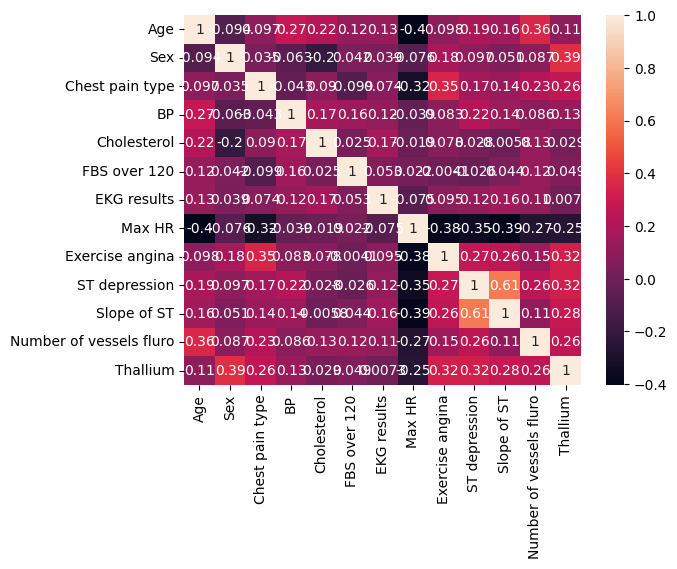

In [ ]:
#correlation heatmap
sns.heatmap((df.corr()),annot=True)

In [ ]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
#dataset description
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
# Distribution of age


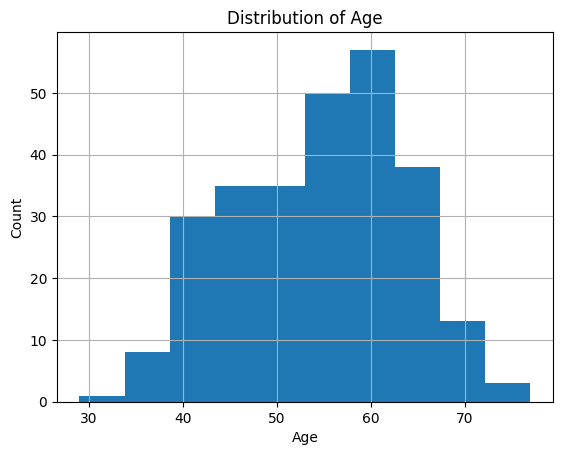

In [ ]:
df["Age"].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

In [ ]:
df['Age'].describe()

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

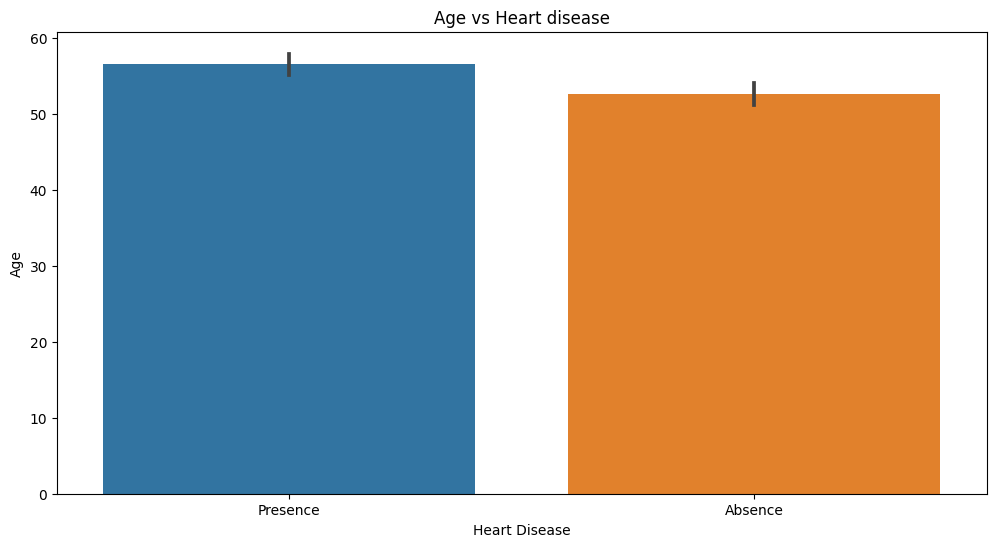

In [ ]:
#age vs heart disease relation
plt.figure(figsize=(12,6))
sns.barplot(x='Heart Disease',y='Age',data=df)
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age vs Heart disease')
plt.show()

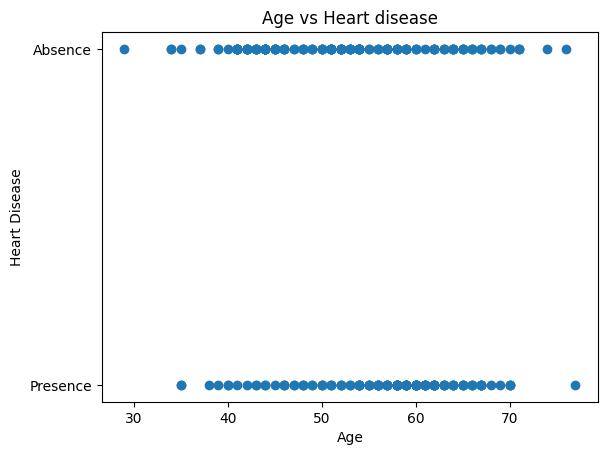

In [ ]:
#Scatter plot of Age vs Heart Disease
plt.scatter(df['Age'],df['Heart Disease'])
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.title('Age vs Heart disease')
plt.show()

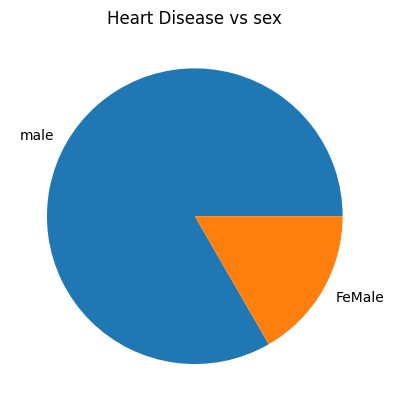

In [ ]:
#pie plot of heart desease vs sex
plt.pie(df[df['Heart Disease']=='Presence']['Sex'].value_counts(),labels=['male','FeMale'])
plt.title('Heart Disease vs sex')
plt.show()

<Axes: xlabel='Sex', ylabel='Age'>

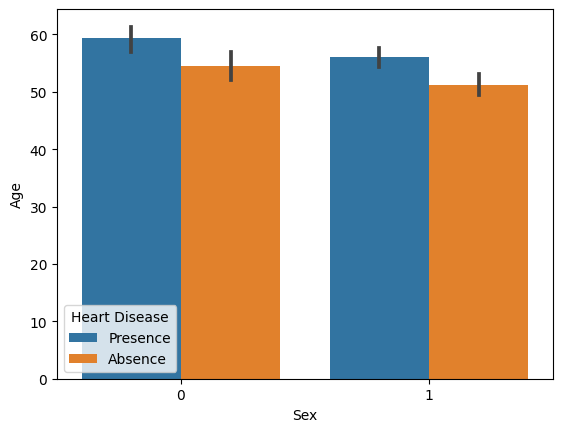

In [ ]:
sns.barplot(x='Sex',y='Age',data=df,hue='Heart Disease')
#barplot of sex vs age with heartdisease as hue

In [ ]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Heart Disease']=le.fit_transform(df['Heart Disease'])

In [ ]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
# seperating dependent and independent variables
y=df.pop('Heart Disease')
x=df

In [ ]:
#Scaling
scaler=StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [ ]:
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032


In [ ]:
x.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
mean,3.667848e-16,6.579099e-18,6.085667e-17,5.682697e-16,-2.467162e-16,4.194176e-17,3.125072e-17,2.631640e-17,7.894919e-17,-5.263280e-17,-1.064992e-16,-6.579099e-17,8.552829e-17
std,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00,1.001857e+00
min,-2.797275e+00,-1.450327e+00,-2.292532e+00,-2.094649e+00,-2.396942e+00,-4.170288e-01,-1.026285e+00,-3.402609e+00,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01
25%,-7.075676e-01,-1.450327e+00,-1.835587e-01,-6.363095e-01,-7.105825e-01,-4.170288e-01,-1.026285e+00,-7.212705e-01,-7.012223e-01,-9.185652e-01,-9.542343e-01,-7.115349e-01,-8.757058e-01
50%,6.232461e-02,6.894997e-01,-1.835587e-01,-7.540984e-02,-9.031247e-02,-4.170288e-01,9.816636e-01,1.653012e-01,-7.012223e-01,-2.187060e-01,6.764193e-01,-7.115349e-01,-8.757058e-01
75%,7.222322e-01,6.894997e-01,8.709276e-01,4.854898e-01,5.881079e-01,-4.170288e-01,9.816636e-01,7.058937e-01,1.426081e+00,4.811532e-01,6.764193e-01,3.498708e-01,1.189277e+00
max,2.481986e+00,6.894997e-01,8.709276e-01,3.850888e+00,6.093004e+00,2.397916e+00,9.816636e-01,2.262800e+00,1.426081e+00,4.505343e+00,2.307073e+00,2.472682e+00,1.189277e+00


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state = 42)

In [ ]:
#decision Tree Classifier

decision Tree Classifier

In [ ]:
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)

In [ ]:
dt_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [ ]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))

[[22 11]
 [ 5 16]]
              precision    recall  f1-score   support

           0       0.81      0.67      0.73        33
           1       0.59      0.76      0.67        21

    accuracy                           0.70        54
   macro avg       0.70      0.71      0.70        54
weighted avg       0.73      0.70      0.71        54



In [ ]:
#22 -> True positives
# 16-> True negatives

Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [ ]:
rf_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
print((confusion_matrix(y_test,rf_pred)))

[[31  2]
 [ 4 17]]


In [ ]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



Support Vector Machines

In [ ]:
svm=SVC()
svm_model=svm.fit(x_train,y_train)
svm_pred=svm_model.predict(x_test)

In [ ]:
svm_pred

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [ ]:
print((confusion_matrix(y_test,svm_pred)))

[[31  2]
 [ 4 17]]


In [ ]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.89      0.87      0.88        54
weighted avg       0.89      0.89      0.89        54



**Conclusions**



1.   Decision Tree Classifier
      *   Precision: 0.81 for class 0 (No heart disease) and 0.59 for class1 (heart disease)
      *   Recall:  0.67 for class 0 and 0.76 for class 1
      *   F1-score:0.73 for class 0 and 0.67 for class 1
      *   Accuracy : The overall accuracy was 0.70


2.   Random Forest Classifier
       *   Precision: 0.84 for class 0 (No heart disease) and 0.94 for class1 (heart disease)
      *   Recall:  0.97 for class 0 and 0.71 for class 1
      *   F1-score:0.90 for class 0 and 0.81 for class 1
      *   Accuracy : The overall accuracy was 0.87
3. Support Vector Machine
      *   Precision: 0.89 for class 0 (No heart disease) and 0.89 for class1 (heart disease)
      *   Recall:  0.94 for class 0 and 0.8 for class 1
      *   F1-score:0.91 for class 0 and 0.85 for class 1
      *   Accuracy : The overall accuracy was 0.89


---
Insight:
Based on these results ,It can be concluded that Random forest classifier model and Support vector machine model outperformed Decision tree model in terms of saccuracy and F1-Score.Both Random forest classifier model and Support vector machine model have higher precision and recall for both classes compared to decision tree classifier model.

therefore,Random forest classifier model and Support vector machine model are considered as the better model for Heart disease prediction based on this dataset.


